In [18]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import MaxPooling2D

In [19]:
classifier = Sequential()

form here we are going to define different Custom CNN layers with differnt paramerters

In [20]:
classifier.add(Convolution2D(32,(3,3),input_shape = (100,100,3), activation = 'relu'))

In [21]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [22]:
classifier.add(Convolution2D(32,(3,3), activation = 'relu'))

In [23]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [24]:
classifier.add(Flatten())

In [25]:
classifier.add(Dense(units=32,activation = 'relu'))

classifier.add(Dense(units=64,activation = 'relu'))

classifier.add(Dense(units=128,activation = 'relu'))

classifier.add(Dense(units=256,activation = 'relu'))

classifier.add(Dense(units=256,activation = 'relu'))

classifier.add(Dense(units=7,activation = 'softmax'))

In [26]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
classes=training_set.class_indices
print(classes)

{'Apple Red 1': 0, 'Banana': 1, 'Cactus fruit': 2, 'Cherry 1': 3, 'Lemon': 4, 'Orange': 5, 'Watermelon': 6}


In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True) 

In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [36]:
print("\nfrom this line we are going to train our model\n")


from this line we are going to train our model



In [30]:
training_set = train_datagen.flow_from_directory('train2',
                                                target_size=(100,100),
                                                batch_size=32, 
                                                class_mode='categorical')

Found 3410 images belonging to 7 classes.


In [31]:
test_set = test_datagen.flow_from_directory('test2',
                                            target_size=(100,100),
                                            batch_size=32,
                                            class_mode='categorical')

Found 1141 images belonging to 7 classes.


In [32]:
his=classifier.fit_generator(training_set,
                         steps_per_epoch=107, 
                         epochs=5, 
                         verbose=1, 
                         validation_data=test_set, 
                         validation_steps=35)

Epoch 1/5
107/107 [==============================] - 65s 609ms/step - loss: 0.5530 - accuracy: 0.7798 - val_loss: 0.1110 - val_accuracy: 0.9661
Epoch 2/5
107/107 [==============================] - 28s 264ms/step - loss: 0.0709 - accuracy: 0.9765 - val_loss: 0.1403 - val_accuracy: 0.9652
Epoch 3/5
107/107 [==============================] - 29s 267ms/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.1732 - val_accuracy: 0.9500
Epoch 4/5
107/107 [==============================] - 28s 265ms/step - loss: 0.0307 - accuracy: 0.9891 - val_loss: 0.2576 - val_accuracy: 0.9580
Epoch 5/5
107/107 [==============================] - 29s 274ms/step - loss: 0.0184 - accuracy: 0.9947 - val_loss: 0.3425 - val_accuracy: 0.9536


In [33]:
classifier.save("small_model.h5")

Now as we have saved and trined our model now we are going to use it in our next ipynb file

now we are going to represent loss function and velidation function graphically

In [44]:
import matplotlib.pyplot as plt


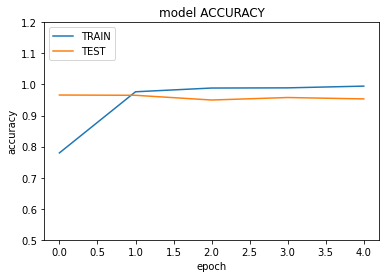

In [45]:
plt.plot(his.history["accuracy"])
plt.plot(his.history['val_accuracy'])
plt.ylim(0.5,1.2)
plt.title('model ACCURACY')
#plt.xlim(1.0,5.0)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['TRAIN','TEST'],loc='upper left')
plt.savefig("graph1.png", dpi=300)

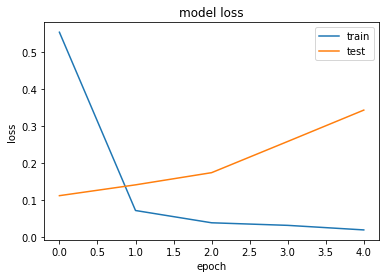

In [46]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
#plt.ylim(0.0,0.8)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [47]:
print("accuracy according to each EPOCH")
print(" 1                   2                   3                   4                   5")
print(his.history["accuracy"])

accuracy according to each EPOCH
 1                   2                   3                   4                   5
[0.7797653675079346, 0.9765396118164062, 0.988563060760498, 0.9891495704650879, 0.9947214126586914]


In [52]:
#confusion matrix
tf.math.confusion_matrix([1, 2, 4], [2, 2, 4])

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]], dtype=int32)>